This notebook shows how to use the `sentinel_segmentation` to for change detection.

### **Notice**
Before running this section, please run the code in `download.ipynb` to download the pre-trained model.

### Import libraries

In [1]:
import torch
from sentinel_segmentation.image_processing import fuse_image
from sentinel_segmentation.data_loader import compute_mean_std
from sentinel_segmentation.models import UnetPlusPlusResnet50WithDropout
from sentinel_segmentation.evaluation import show_single_prediction, predict_single_image
from sentinel_segmentation.visualization import load_and_preprocess_image

/Users/yc4523/Desktop/irp_updated/s2s/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Set up the device

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


### Image fusion

In [3]:
fuse_image('../example/change_detection/jpg/Dheru_2016-03-23_RGB.jpg',
           '../example/change_detection/jpg/Dheru_2016-03-23_NIR.jpg',
           '../example/change_detection/jpg/Dheru_2016-03-23_NDWI.jpg',
           '../example/change_detection/jpg/Dheru_2016-03-23_NDVI.jpg',
           '../example/change_detection/npy/Dheru_2016-03-23_fused_image.npy')

Fused image saved at ../example/npy/Dheru_2016-03-23_fused_image.npy


In [4]:
fuse_image('../example/change_detection/jpg/Dheru_2019-03-18_RGB.jpg',
           '../example/change_detection/jpg/Dheru_2019-03-18_NIR.jpg',
           '../example/change_detection/jpg/Dheru_2019-03-18_NDWI.jpg',
           '../example/change_detection/jpg/Dheru_2019-03-18_NDVI.jpg',
           '../example/change_detection/npy/Dheru_2019-03-18_fused_image.npy')

Fused image saved at ../example/npy/Dheru_2019-03-18_fused_image.npy


In [5]:
fuse_image('../example/change_detection/jpg/Dheru_2024-03-31_RGB.jpg',
           '../example/change_detection/jpg/Dheru_2024-03-31_NIR.jpg',
           '../example/change_detection/jpg/Dheru_2024-03-31_NDWI.jpg',
           '../example/change_detection/jpg/Dheru_2024-03-31_NDVI.jpg',
           '../example/change_detection/npy/Dheru_2024-03-31_fused_image.npy')

Fused image saved at ../example/npy/Dheru_2024-03-31_fused_image.npy


### Calculate mean and std values of the images

In [6]:
mean, std = compute_mean_std('../example/npy')
print(f"Mean: {mean}, Std: {std}")

Mean: [ 60.3930786  126.55589073 140.39827384  29.07901793 208.28288922
  52.68367689], Std: [31.86195909 44.17212154 46.40516043 44.19675307 62.45746061 54.8324236 ]


### Load the images

In [7]:
image_1 = load_and_preprocess_image('../example/change_detection/npy/Dheru_2016-03-23_fused_image.npy', (128,128), mean, std)
image_2 = load_and_preprocess_image('../example/change_detection/npy/Dheru_2019-03-18_fused_image.npy', (128,128), mean, std)
image_3 = load_and_preprocess_image('../example/change_detection/npy/Dheru_2024-03-31_fused_image.npy', (128,128), mean, std)

### Prediction

In [8]:
model = UnetPlusPlusResnet50WithDropout(dropout_p=0.5)
model.load_state_dict(torch.load('downloads/trained_model/UnetPlusPlus-Resnet50.pth', map_location=device))
model = model.to(device)
model.eval()

/var/folders/b3/k0w8k2kd1s78zzp67h0d95900000gp/T/ipykernel_73958/32440920.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('downloads/tra

UnetPlusPlusResnet50WithDropout(
  (model): UnetPlusPlus(
    (encoder): ResNetEncoder(
      (conv1): Conv2d(6, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tru

In [9]:
prediction = predict_single_image(model, image_1, device)

In [10]:
color_to_label = {
    (0, 0, 0): 0,    # background - black
    (255, 0, 0): 1,  # harbor - red
    (0, 255, 0): 2,  # jetty - green
    (0, 0, 255): 3   # resort - blue
}

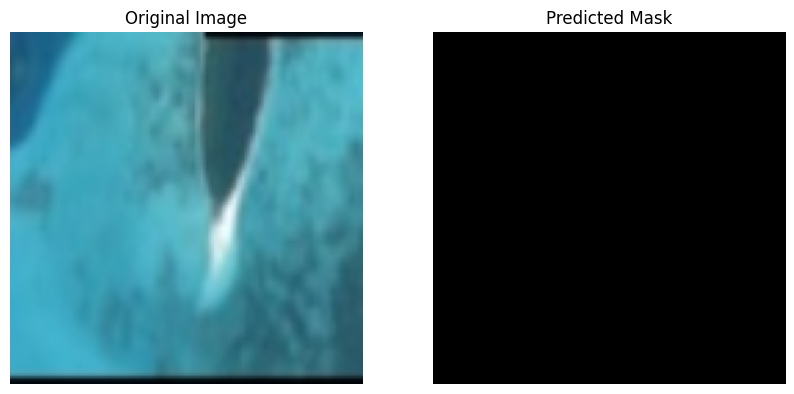

In [11]:
show_single_prediction(image_1, prediction, color_to_label, mean, std)

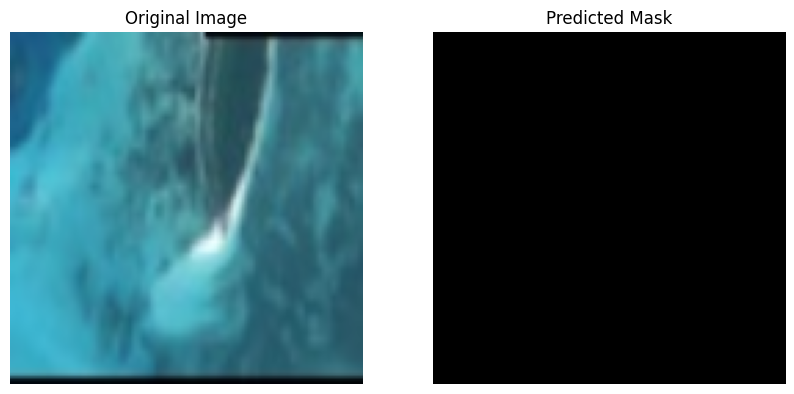

In [12]:
prediction = predict_single_image(model, image_2, device)
show_single_prediction(image_2, prediction, color_to_label, mean, std)

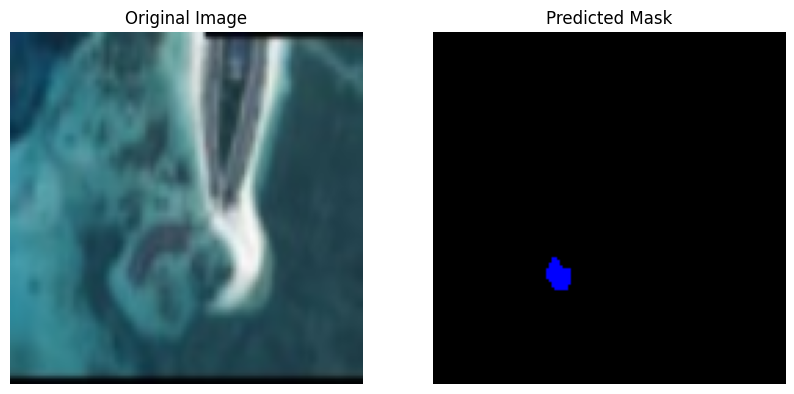

In [13]:
prediction = predict_single_image(model, image_3, device)
show_single_prediction(image_3, prediction, color_to_label, mean, std)